In [1]:
#import tensorflow 
import tensorflow 


The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

<font color='green'> 

airplane
automobile 
bird 
cat 
deer 
dog 
frog 
horse 
ship 
truck
<font>

https://www.kaggle.com/c/cifar-10/data


In [2]:
#import built in data set call cifar 10
from tensorflow.keras.datasets import cifar10

#asign data to train and test 
train, test = cifar10.load_data()

#asign data to features and labels 
x_train, y_train = train
x_test, y_test = test


In [3]:
#check the shape of the loaded and splitted data 

print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


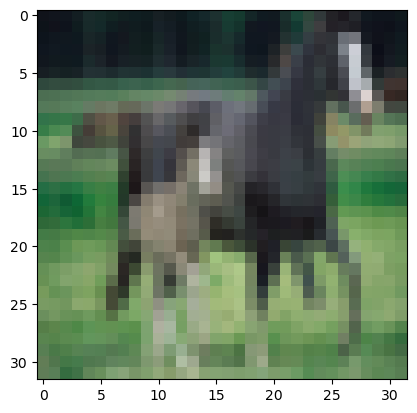

In [4]:
import matplotlib.pyplot as plt

#display a random loaded img
plt.imshow(x_train[320])

In [5]:
#create function to get the name from the labels

class_name = ['airplane', 'automobile', 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

def get_name(n):
    return class_name[7]

horse


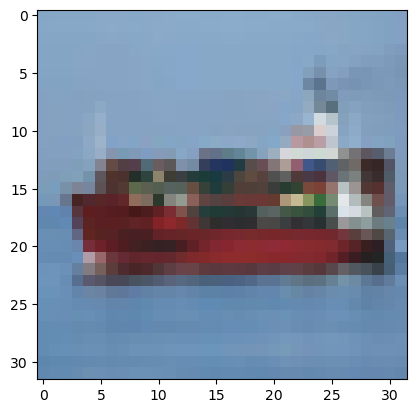

In [6]:
n=202
plt.imshow(x_test[n])
print( get_name(int(y_test[n])))

In [7]:
#get the maximum and minimum values 
print("x_train  max: {}, x_train  min: {}". format(x_train.max(), x_train.min()))

x_train  max: 255, x_train  min: 0


In [8]:
#normalize data 
x_train = x_train/255
x_test = x_test/255

In [9]:
#get the maximum and minimum values after normalizing 
print("x_train  max: {}, x_train  min: {}". format(x_train.max(), x_train.min()))

x_train  max: 1.0, x_train  min: 0.0


In [26]:
#create the model 

from tensorflow.keras.models import Sequential

model = Sequential()

In [27]:
#add first Conv2D layer 
from tensorflow.keras.layers import Conv2D

#adding first layer Conv2D
#filter (kernel) = 32
#kernel size = 3
#padding = same
#activation = Relu
#input shape = (32, 32, 3)
#strides = (1,1)

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32,3], strides=(1,1)))

In [28]:
#adding Conv2D layer and pooling layer 

#adding second layer Conv2D
#number of filter = 32
#kernel size =3
#padding = same 
#activton = Relu 
#strides = (1,1)

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=(1,1)))

#adding maxpool layer 
from tensorflow.keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

In [29]:
#addig 3rd CNN layer 
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

In [30]:
#add dropuout layer 

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.4))

In [31]:
#add Flatten layers 

from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [32]:
#adding frist dense layer 
from tensorflow.keras.layers import Dense

model.add(Dense(units=128, activation='relu'))

In [33]:
#adding secod dense layer 
model.add(Dense(units=64, activation='relu'))

In [34]:
#adding output layer 
model.add(Dense(units=10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [36]:
#model compile 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
#model fit 
from tensorflow.keras.callbacks import EarlyStopping

callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size=20, validation_data=(x_test, y_test),callbacks=[callbacks] )

Epoch 1/100


2023-12-19 22:25:27.115799: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2500/2500 [==============================] - 123s 49ms/step - loss: 1.4224 - sparse_categorical_accuracy: 0.4861 - val_loss: 1.0771 - val_sparse_categorical_accuracy: 0.6128
Epoch 2/100
2500/2500 [==============================] - 120s 48ms/step - loss: 1.0007 - sparse_categorical_accuracy: 0.6447 - val_loss: 0.8837 - val_sparse_categorical_accuracy: 0.6916
Epoch 3/100
2500/2500 [==============================] - 124s 50ms/step - loss: 0.8464 - sparse_categorical_accuracy: 0.7050 - val_loss: 0.8646 - val_sparse_categorical_accuracy: 0.7037
Epoch 4/100
2500/2500 [==============================] - 122s 49ms/step - loss: 0.7505 - sparse_categorical_accuracy: 0.7358 - val_loss: 0.7727 - val_sparse_categorical_accuracy: 0.7283
Epoch 5/100
2500/2500 [==============================] - 142s 57ms/step - loss: 0.6773 - sparse_categorical_accuracy: 0.7619 - val_loss: 0.8153 - val_sparse_categorical_accuracy: 0.7196
Epoch 6/100
2500/2500 [==============================] - 113s 45ms/step - loss: 0.